# Contraste

In [1]:
# librairies pour l'interaction
%matplotlib notebook
from ipywidgets import interact, FloatSlider, Layout
import ipywidgets as widgets

In [2]:
# librairies scientifiques usuelles
from scipy.signal import gausspulse
from scipy import fftpack
# graphiques
import matplotlib.pyplot as plt
from numpy import pi, exp, linspace, cos
import numpy as np

from matplotlib.colors import LinearSegmentedColormap

Le contraste est défini comme :
$$C = \frac{I_\mathrm{max} - I_\mathrm{min}}{I_\mathrm{max} + I_\mathrm{min}}.$$
La formule de Fresnel peut s'écrire de la manière suivante :
$$I(M) = I_\mathrm{moy} \left[1 + C \cos(\varphi(M))\right]$$
avec $I_\mathrm{moy}$ l'intensité moyenne de la figure d'interférences.

In [3]:
def I(phi, C):
    return 1 + C*cos(phi)

<IPython.core.display.Javascript object>


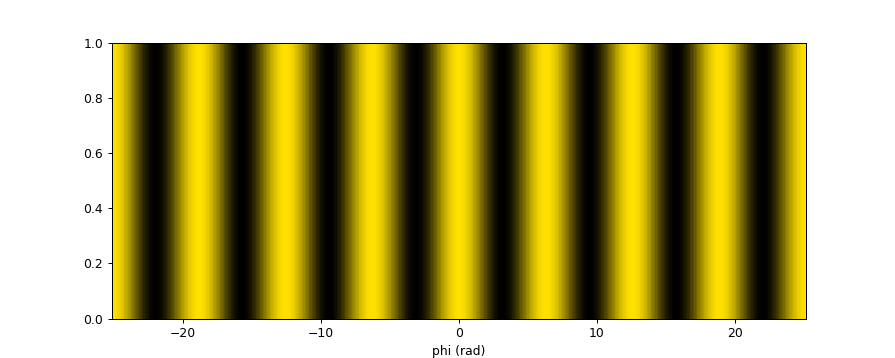

interactive(children=(FloatSlider(value=1.0, description='C', layout=Layout(width='100%'), max=1.0, step=0.05)…

<function __main__.update_C(C=1)>

In [4]:
# Tracé du graphique

# paramètres d'affichage
phimax = 8 * pi
npoints = 500

# Couleur jaune sodium
cmap1 = LinearSegmentedColormap.from_list(
    "my_colormap", ((0, 0, 0), (1, .88, 0)), N=400, gamma=1.0)

# génération de la figure d'interférences
y, x = np.meshgrid(np.linspace(0, 1, 2), np.linspace(-phimax, phimax, npoints))
z = I(x, 1)
z = z[:-1, :-1]

fig = plt.figure(figsize=(10, 4))



quad = plt.pcolormesh(x, y, z, cmap=cmap1)

plt.xlabel("phi (rad)")
plt.xlim([-phimax, phimax])


# Gestion des mises à jour lorsqu'on déplace le curseur

C_widget = FloatSlider(min=0, max=1, value=1, step=.05,
                       layout=Layout(width='100%'))


def update_C(C=1):
    """Met à jour le graphique lorsqu'on déplace le curseur"""
    z = I(x, C)
    z = z[:-1, :-1]

    quad.set_array(z.ravel())
    plt.draw()


interact(update_C, C=C_widget)